# Welcome to US Election Result Studies

### Objective : Whether US ELECTION results is effected by covid-19 or not?

Covid-19 is dominating the agenda in this US election, with Donald Trump defending his record against critique by Joe Biden, who wants to engage experts more and take a centralised, coordinated approach to the ending the pandemic. 

Trump’s response to the Covid-19 pandemic
It is not particularly surprising that Covid-19 is dominating the agenda. The US currently has both the highest number of cases and deaths in the world – with eight million cases and more than 222,000 deaths, according to the John Hopkins University tracker.

There has been significant criticism of the Trump administration’s handling of this healthcare crisis, particularly around his role in spreading misinformation – for instance, he infamously suggested ingesting bleach to rid the body of Covid-19 in comments he later described as “sarcastic” –  as well as his mixed messages on the benefits of wearing masks as a public health measure. Trump has consistently defended his position on Twitter and in televised debates with Biden, and pushed blame for the viral outbreak on to others, including China and the World Health Organization (WHO).

### Let's Import the modules

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### Building Dataset for the above mentioned objective

In [11]:
us_conf=pd.read_csv('us_confirmed.csv')
us_conf.head(2)

,Admin2,Date,Case,Country/Region,Province/State
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama


In [12]:
us_deaths=pd.read_csv('us_deaths.csv')
us_deaths.head(2)

,Admin2,Date,Case,Country/Region,Province/State
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama


In [13]:
us_conf.set_index(us_conf['Province/State'],inplace=True)
us_conf.rename(columns={'Province/State': 'Province'},inplace=True)
us_deaths.set_index(us_deaths['Province/State'],inplace=True)
us_deaths.rename(columns={'Province/State': 'Province'},inplace=True)

In [14]:
confirmed_df_prov=us_conf.groupby(['Province']).sum().copy()
death_df_prov=us_deaths.groupby(['Province']).sum().copy()

In [15]:
combined_df=pd.DataFrame()
combined_df['Confirmed']=confirmed_df_prov[confirmed_df_prov.columns[-1]]
combined_df['Deaths']=death_df_prov[death_df_prov.columns[-1]]

###### BUILDING US PROVINCE -WISE DATA

In [16]:
sorted_combined_df=combined_df.loc[:,["Confirmed","Deaths"]].sort_values("Confirmed",ascending=False)
sorted_combined_df['State']=sorted_combined_df.index
combined_df.loc[:,["Confirmed","Deaths"]].sort_values("Confirmed",ascending=False).style.background_gradient(cmap='Blues',subset=["Confirmed"]).background_gradient(cmap='Reds',subset=["Deaths"])

,Confirmed,Deaths
Province,,
California,119285680,2358577
Texas,110400219,2140414
Florida,101170160,1988456
New York,99350372,7353995
Illinois,54378491,1701401
Georgia,46596886,1070985
New Jersey,43927338,3368889
Arizona,33470869,804217
North Carolina,32264869,539445


###### We took the above data to excel using below code

In [17]:
#sorted_combined_df.to_excel('US_Province_details.xlsx')

###### Now ,Manually included the US_Election data.Adding a categorical column named winner in which has two levels as Trump & Biden

### Importing the Dataset

This is the dataset which we made manually to analyse whether there is any relation between confirmed cases and election results

In [19]:
us_elec=pd.read_excel("US_Province_details.xlsx")
us_elec

,Province,Confirmed,Deaths,Donald Trump,Percentage of vote(Trump),Electoral Vote(Trump),Joe Biden,Percentage of votes(Biden),Electoral Vote(Biden),Winner
0,Alabama,22533315,390950,1434315,62.28,9,843724,36.64,0.0,Trump
1,Alaska,1556461,8599,187056,53.24,3,150764,42.91,0.0,Trump
2,Arizona,33470869,804217,1661677,49.09,0,1672054,49.39,11.0,Biden
3,Arkansas,12281557,188108,758842,62.54,6,420253,34.63,0.0,Trump
4,California,119285680,2358577,5810670,34.14,0,10844195,63.71,55.0,Biden
5,Colorado,14007247,410964,1364202,41.90,0,1803921,55.40,9.0,Biden
6,Connecticut,12302204,944219,714581,39.20,0,1080471,59.28,7.0,Biden
7,Delaware,3651704,118831,200603,39.80,0,296268,58.78,3.0,Biden
8,District of Columbia,2832579,123141,18172,5.50,0,307265,92.94,3.0,Biden
9,Florida,101170160,1988456,5668731,51.22,29,5297045,47.87,0.0,Trump


<AxesSubplot:>

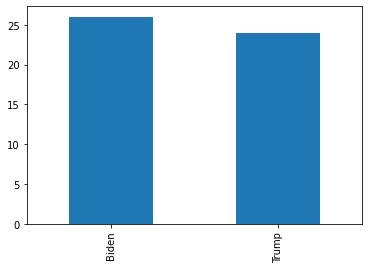

In [20]:
us_elec['Winner'].value_counts().plot(kind='bar')

In [21]:
us_elec1 = us_elec.transpose()
us_elec1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Province,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Confirmed,22533315,1556461,33470869,12281557,119285680,14007247,12302204,3651704,2832579,101170160,...,4295910,29409273,110400219,12362817,371631,23536725,14431250,2550924,22213676,1317743
Deaths,390950,8599,804217,188108,2358577,410964,944219,118831,123141,1988456,...,46472,363252,2140414,76688,13221,524801,389777,51230,282473,10288
Donald Trump,1434315,187056,1661677,758842,5810670,1364202,714581,200603,18172,5668731,...,261035,1849211,5874547,852677,112688,1961126,1574498,544826,1610145,193559
Percentage of vote(Trump),62.28,53.24,49.09,62.54,34.14,41.9,39.2,39.8,5.5,51.22,...,61.77,60.72,52.13,58.02,30.84,44.27,38.98,68.64,48.94,70.38


In [22]:
#Set the column labels to equal the values in the 2nd row (index location 1):
us_elec1.columns = us_elec1.iloc[0] 
#If the index has unique labels, you can drop the 2nd row using:
us_elec1.drop(us_elec1.index[0])
#If the index is not unique, you could use:
us_elec1.iloc[pd.RangeIndex(len(us_elec1)).drop(0)]

Province,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Confirmed,22533315,1556461,33470869,12281557,119285680,14007247,12302204,3651704,2832579,101170160,...,4295910,29409273,110400219,12362817,371631,23536725,14431250,2550924,22213676,1317743
Deaths,390950,8599,804217,188108,2358577,410964,944219,118831,123141,1988456,...,46472,363252,2140414,76688,13221,524801,389777,51230,282473,10288
Donald Trump,1434315,187056,1661677,758842,5810670,1364202,714581,200603,18172,5668731,...,261035,1849211,5874547,852677,112688,1961126,1574498,544826,1610145,193559
Percentage of vote(Trump),62.28,53.24,49.09,62.54,34.14,41.9,39.2,39.8,5.5,51.22,...,61.77,60.72,52.13,58.02,30.84,44.27,38.98,68.64,48.94,70.38
Electoral Vote(Trump),9,3,0,6,0,0,0,0,0,29,...,3,11,38,6,0,0,0,5,0,3
Joe Biden,843724,150764,1672054,420253,10844195,1803921,1080471,296268,307265,5297045,...,150467,1139666,5236610,555694,242805,2404510,2359319,235657,1630712,73491
Percentage of votes(Biden),36.64,42.91,49.39,34.63,63.71,55.4,59.28,58.78,92.94,47.87,...,35.61,37.42,46.46,37.81,66.44,54.28,58.42,29.69,49.57,26.72
Electoral Vote(Biden),0,0,11,0,55,9,7,3,3,0,...,0,0,0,0,3,13,12,0,10,0
Winner,Trump,Trump,Biden,Trump,Biden,Biden,Biden,Biden,Biden,Trump,...,Trump,Trump,Trump,Trump,Biden,Biden,Biden,Trump,Biden,Trump


#### Plotting to compare the election results of Trump

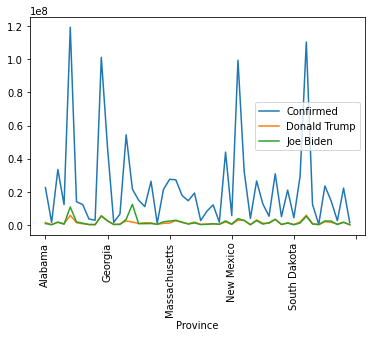

In [40]:
us_elec1.loc['Confirmed'].plot()
us_elec1.loc['Donald Trump'].plot()
us_elec1.loc['Joe Biden'].plot()
plt.xticks(rotation=90)
plt.legend()

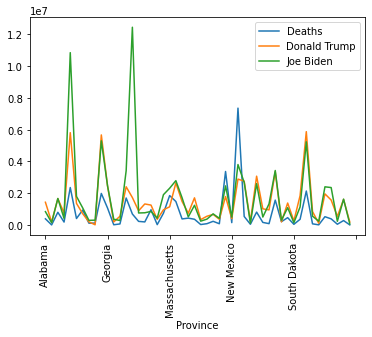

In [41]:
us_elec1.loc['Deaths'].plot()
us_elec1.loc['Donald Trump'].plot()
us_elec1.loc['Joe Biden'].plot()
plt.xticks(rotation=90)
plt.legend()

###### From the graph we can understand that,Even in the High confirmed cases Province Biden's vote count is increasing through out the states more than Trump

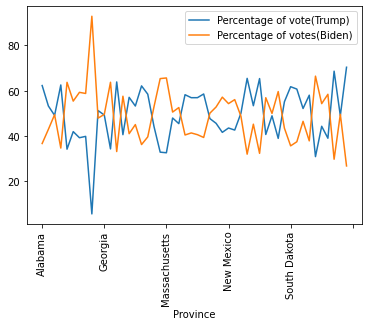

In [42]:
us_elec1.loc['Percentage of vote(Trump)'].plot()
us_elec1.loc['Percentage of votes(Biden)'].plot()
plt.xticks(rotation=90)
plt.legend()

### Electrol votes

In the Electoral College System, each state gets a certain number of electors based on its total number of representatives in Congress. Each elector casts one electoral vote following the general election; there are a total of 538 electoral votes. The candidate that gets more than half (270) wins the election.

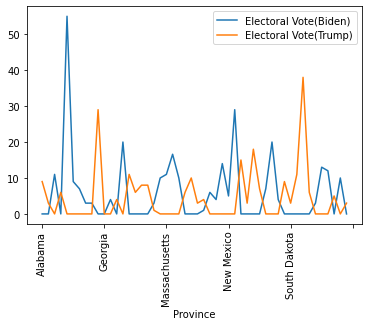

In [43]:
#Electrol votes compared to Covid-19

us_elec1.loc['Electoral Vote(Biden)'].plot()
us_elec1.loc['Electoral Vote(Trump)'].plot()
plt.xticks(rotation=90)
plt.legend()

In [27]:
Total_ev_Biden=us_elec['Electoral Vote(Biden)'].sum()
print('The total Electrol Votes for Biden :',Total_ev_Biden)

The total Electrol Votes for Biden : 290.6


In [28]:
Total_ev_Trump=us_elec['Electoral Vote(Trump)'].sum()
print('The total Electrol Votes for Trump :',Total_ev_Trump)

The total Electrol Votes for Trump : 226


###### The candidate with the highest number of votes (provided it was a majority of the electoral votes) became the president.Hence Biden won the election.

In [29]:
#Corelation

In [30]:
data=us_elec[['Confirmed','Deaths','Percentage of vote(Trump)','Percentage of votes(Biden)']]
data.corr()

,Confirmed,Deaths,Percentage of vote(Trump),Percentage of votes(Biden)
Confirmed,1.000000,0.755226,-0.116971,0.138229
Deaths,0.755226,1.000000,-0.203617,0.222438
Percentage of vote(Trump),-0.116971,-0.203617,1.000000,-0.998446
Percentage of votes(Biden),0.138229,0.222438,-0.998446,1.000000


<AxesSubplot:>

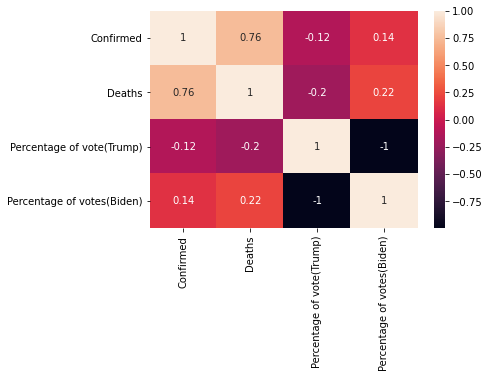

In [31]:
sns.heatmap(data.corr(),annot=True)

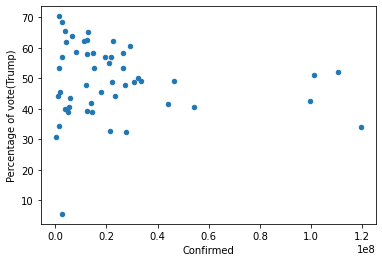

In [32]:
#Scatter plot between confirmed cases and percentage of votes for Trump
scatter_plot = us_elec.plot.scatter(x='Confirmed',y='Percentage of vote(Trump)')

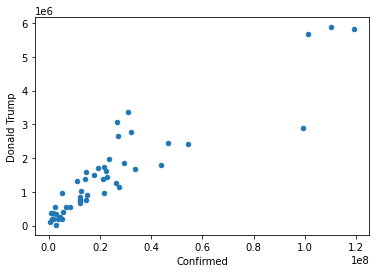

In [33]:
scatter_plot = us_elec.plot.scatter(x='Confirmed',y='Donald Trump')

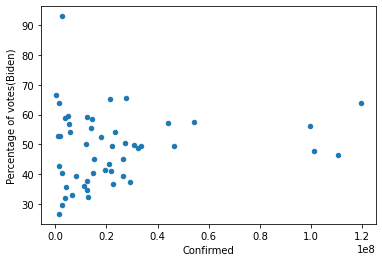

In [34]:
#Scatter plot between confirmed cases and percentage of votes for Biden
scatter_plot = us_elec.plot.scatter(x='Confirmed',y='Percentage of votes(Biden)')

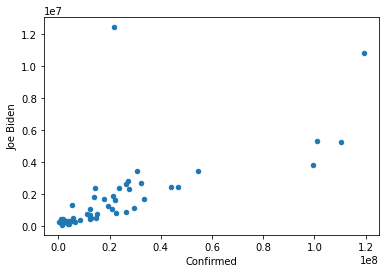

In [35]:
scatter_plot = us_elec.plot.scatter(x='Confirmed',y='Joe Biden')

In [36]:
boxp=pd.DataFrame({'Confirmed':us_elec.Confirmed,'Winner':us_elec.Winner})

In [37]:
boxp

,Confirmed,Winner
0,22533315,Trump
1,1556461,Trump
2,33470869,Biden
3,12281557,Trump
4,119285680,Biden
5,14007247,Biden
6,12302204,Biden
7,3651704,Biden
8,2832579,Biden
9,101170160,Trump


<AxesSubplot:xlabel='Winner', ylabel='Deaths'>

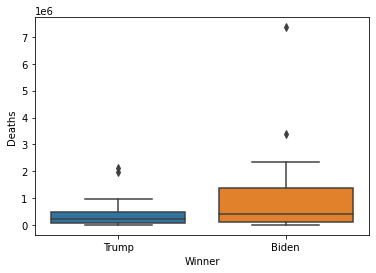

In [38]:
sns.boxplot(x=us_elec['Winner'],y=us_elec['Deaths'])

In [39]:
# Clearly we can see biden won the states in which corona death is more

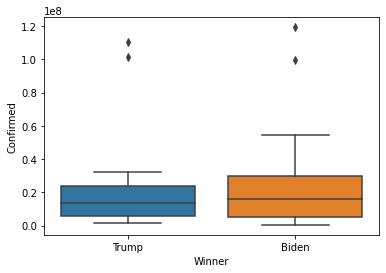

In [30]:
#Bivariate Box Plot
ax=sns.boxplot(x='Winner',y='Confirmed',data=boxp)

In [31]:
#Death count had more impact on Biden win than Confirmed count

In [32]:
us_elec['recover']=(us_elec['Confirmed']-us_elec['Deaths']) / us_elec['Confirmed']

In [33]:
us_elec.head(2)

,Province,Confirmed,Deaths,Donald Trump,Percentage of vote(Trump),Electoral Vote(Trump),Joe Biden,Percentage of votes(Biden),Electoral Vote(Biden),Winner,recover
0,Alabama,22533315,390950,1434315,62.28,9,843724,36.64,0.0,Trump,0.982650
1,Alaska,1556461,8599,187056,53.24,3,150764,42.91,0.0,Trump,0.994475


<AxesSubplot:xlabel='Winner', ylabel='recover'>

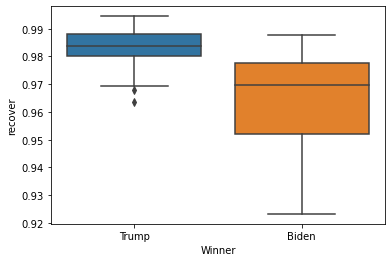

In [34]:
sns.boxplot(x=us_elec['Winner'],y=us_elec['recover'])

In [35]:
#Biden doing well in the state where recover rate is less.

## Analysis on Tight contested states

#Filter out the tight contested states(close results)then do all the above analysis only in tight contested states
https://theconversation.com/us-election-six-swing-states-likely-to-decide-who-is-the-next-president-148135

1.Pennsylvania : has 20 electoral college votes, which Trump won in 2016 with a 0.78% margin. For 2020, Biden carries a lead in the polls and has gained ground over the course of the campaign

2.Arizona : is a sunbelt and border state, which has voted Republican since 1957, except when Bill Clinton won it in 1996. Large demographic shifts and migration of people from California, as well as the presence of the oft-attacked McCain dynasty have changed the political complexion of the state.
Biden heads into November 3 with a lead in the polls in Arizona, which has 11 electoral votes. Meanwhile, the “independent” Democratic candidate Mark Kelly is leading in his Senate race against incumbent Republican Martha McSally.
3.Texas

3.Texas : In Texas, Biden is neck and neck with Trump in a traditionally Republican state that shares a long border with Mexico – a focal point for Trump’s promise to build a wall – and a strong cohort of Latino Republican voters. With 38 electoral college votes at stake, the state has been a reliable stronghold for Trump, who will likely win by a whisker.

4.Florida : With 29 electoral college votes up for grabs, the race in the Sunshine State is very tight. 
Trump has made the state his home, and enjoys support among Cuban and Venezuelan Americans there. Both campaigns have sought to woo voters with Trump rallies, Biden events, and a visit from Barack Obama in Miami and Orlando. St. Petersburg and Tampa have voted Democrat in past elections, and a recent Reuters/Ipsos poll puts both candidates in a statistical dead heat.

5.Georgia : One of the original colonies, part of the “old south”, Georgia has participated in all elections since the founding (with the exception of 1864 during its secession). It was a Democratic stronghold until 1972, when it flipped Republican. Biden has a slight lead, but like Florida, the margin of error in polling suggests that the state is still in toss-up territory.

6.Wisconsin : Known for its cheese production and Miller beer (since 1855), Wisconsin has ten electoral votes. Trump won the state in 2016 with only a 0.7% margin in the popular vote. Biden leads by over an average of 6% (in one poll by 17%) and is likely to take the state in 2020. Unlike in Pennsylvania, a few days before polling day, the Supreme Court ruled that the state’s decision to extend the election by six days could not be upheld and that only those ballots received by the deadline would be counted, as it is done in over 30 other states.

In [36]:
us_elec['Province'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [37]:
tight_con_province=us_elec.loc[(us_elec['Province']=="Pennsylvania") | (us_elec['Province']=="Arizona") | (us_elec['Province']=="Texas") | (us_elec['Province']=="Florida") | (us_elec['Province']=="Georgia") | (us_elec['Province']=="Wisconsin")]

In [38]:
tight_con_province

,Province,Confirmed,Deaths,Donald Trump,Percentage of vote(Trump),Electoral Vote(Trump),Joe Biden,Percentage of votes(Biden),Electoral Vote(Biden),Winner,recover
2,Arizona,33470869,804217,1661677,49.09,0,1672054,49.39,11.0,Biden,0.975973
9,Florida,101170160,1988456,5668731,51.22,29,5297045,47.87,0.0,Trump,0.980345
10,Georgia,46596886,1070985,2457895,49.24,0,2472050,49.52,0.0,Biden,0.977016
37,Pennsylvania,30859961,1568500,3359349,48.90,0,3431728,49.95,20.0,Biden,0.949174
42,Texas,110400219,2140414,5874547,52.13,38,5236610,46.46,0.0,Trump,0.980612
48,Wisconsin,22213676,282473,1610145,48.94,0,1630712,49.57,10.0,Biden,0.987284


In [47]:
df1=tight_con_province[['Province','Confirmed','Deaths','Percentage of vote(Trump)','Percentage of votes(Biden)','Winner']].style.background_gradient(cmap='Blues',subset=["Confirmed"]).background_gradient(cmap='Reds',subset=["Deaths"])
df1

,Province,Confirmed,Deaths,Percentage of vote(Trump),Percentage of votes(Biden),Winner
2,Arizona,33470869,804217,49.090000,49.390000,Biden
9,Florida,101170160,1988456,51.220000,47.870000,Trump
10,Georgia,46596886,1070985,49.240000,49.520000,Biden
37,Pennsylvania,30859961,1568500,48.900000,49.950000,Biden
42,Texas,110400219,2140414,52.130000,46.460000,Trump
48,Wisconsin,22213676,282473,48.940000,49.570000,Biden


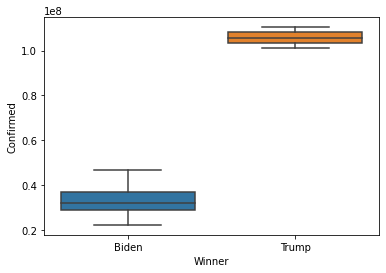

In [43]:
#Bivariate Box Plot
ax=sns.boxplot(x='Winner',y='Confirmed',data=tight_con_province)

<AxesSubplot:xlabel='Winner', ylabel='Deaths'>

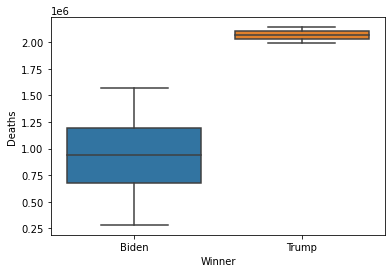

In [44]:
sns.boxplot(x='Winner',y='Deaths',data=tight_con_province)

In [45]:
top_prov_conf=us_elec.loc[(us_elec['Province']=="California") | (us_elec['Province']=="Texas") | (us_elec['Province']=="Florida") | (us_elec['Province']=="New York") | (us_elec['Province']=="Illinois")]

In [52]:
df=top_prov_conf[['Province','Confirmed','Deaths','Percentage of vote(Trump)','Percentage of votes(Biden)','Winner']].style.background_gradient(cmap='Blues',subset=["Confirmed"]).background_gradient(cmap='Reds',subset=["Deaths"])
df

,Province,Confirmed,Deaths,Percentage of vote(Trump),Percentage of votes(Biden),Winner
4,California,119285680,2358577,34.140000,63.710000,Biden
9,Florida,101170160,1988456,51.220000,47.870000,Trump
13,Illinois,54378491,1701401,40.550000,57.560000,Biden
31,New York,99350372,7353995,42.590000,56.060000,Biden
42,Texas,110400219,2140414,52.130000,46.460000,Trump


<AxesSubplot:>

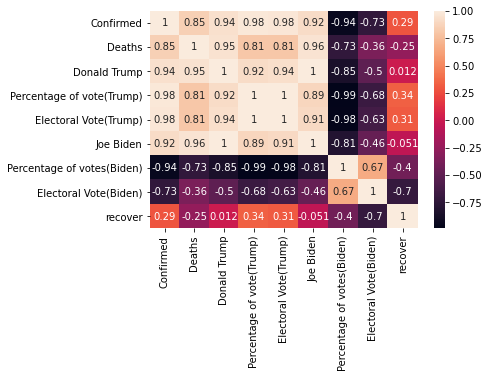

In [49]:
sns.heatmap(tight_con_province.corr(),annot=True)

### In Tight contested states also, Death count had more impact on Biden win than Confirmed counts


### If you like the work don't forget to upvote